In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# print(module_path)
# sys.path.append(module_path)
import model.parts.utils as utils
from model.sys_params import *
tax_df = pd.read_pickle(r'index_spoofer_scen_3_all_slash_del_tax.p')
percent_df = pd.read_pickle(r'index_spoofer_scen_3_all_slash_slash_pct.p')
no_slash_tax_df = pd.read_pickle(r'index_spoofer_scen_3_no_slash_del_tax.p')
no_slash_slash_df = pd.read_pickle(r'index_spoofer_scen_3_no_slash_slash_pct.p')

stakeDelegateds: 605 events
stakeDelegatedLockeds: 375 events
stakeDelegatedWithdrawns: 326 events
allocationCloseds: 47 events
allocationCollecteds: 16 events
stakeDepositeds: 25 events
rewardsAssigneds: 47 events
delegationParametersUpdateds: 6 events
allocationCreateds: 51 events
TOTAL NUMBER OF EVENTS: 1529
You should set SIMULATION_TIME_STEPS in config.py to a minimum of 1529 to capture all events.



In [2]:
# from model.config import simulation_config
experiment =  pd.read_pickle('index_spoofer_scen_3_all_slash_del_tax_config.p')
slash_pct_experiment = pd.read_pickle('index_spoofer_scen_3_all_slash_slash_pct_config.p')
no_slash_tax_experiment = pd.read_pickle('index_spoofer_scen_3_no_slash_del_tax_config.p')
no_slash_slash_experiment = pd.read_pickle('index_spoofer_scen_3_no_slash_slash_pct_config.p')


In [3]:
len(experiment)

3

In [4]:
tax_df.reset_index(inplace = True)
percent_df.reset_index(inplace = True)
no_slash_tax_df.reset_index(inplace = True)
no_slash_slash_df.reset_index(inplace = True)

In [5]:
tax_df.head()

,index,indexers,delegator_portfolios,block_number,epoch,injected_event_shift,simulation,subset,run,substep,timestep
0,6,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,1,0,0,1,6,1
1,12,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,1,0,0,1,6,2
2,18,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,2,0,0,1,6,3
3,24,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,2,0,0,1,6,4
4,30,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474307,4,3,0,0,1,6,5


In [6]:
tax_df.tail()

,index,indexers,delegator_portfolios,block_number,epoch,injected_event_shift,simulation,subset,run,substep,timestep
4582,27500,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{'0x698b40f200f6c8145f9dee82c06884152c2f4a86':...,12060840,92,373,0,2,2,6,1525
4583,27506,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{'0x698b40f200f6c8145f9dee82c06884152c2f4a86':...,12062933,92,374,0,2,2,6,1526
4584,27512,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{'0x698b40f200f6c8145f9dee82c06884152c2f4a86':...,12062933,92,374,0,2,2,6,1527
4585,27518,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{'0x698b40f200f6c8145f9dee82c06884152c2f4a86':...,12063922,92,375,0,2,2,6,1528
4586,27524,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{'0x698b40f200f6c8145f9dee82c06884152c2f4a86':...,12063922,92,375,0,2,2,6,1529


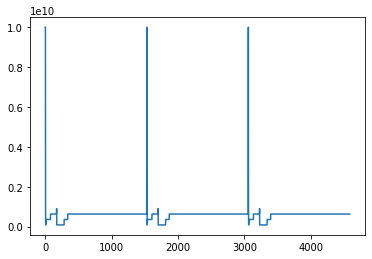

In [7]:
GRT_list = []
for i in tax_df['indexers']:
    GRT_list.append(i[1].GRT)
plt.plot(tax_df.index, GRT_list)

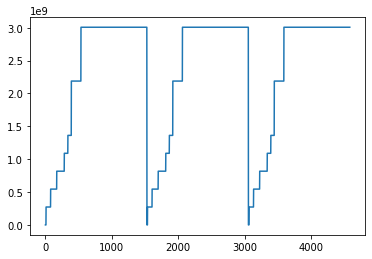

In [8]:
holdings_list = []
for i in tax_df['indexers']:
    if i[1].holdings is not None:
        holdings_list.append(i[1].holdings)
    else:
        holdings_list.append(0)
plt.plot(tax_df.index, holdings_list)

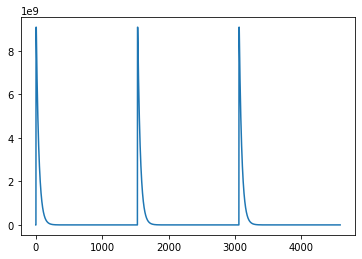

In [9]:
deposited_stake_list = []
for i in tax_df['indexers']:
    if i[1].cumulative_deposited_stake is not None:
        deposited_stake_list.append(i[1].cumulative_deposited_stake)
    else:
        deposited_stake_list.append(0)
plt.plot(tax_df.index, deposited_stake_list)

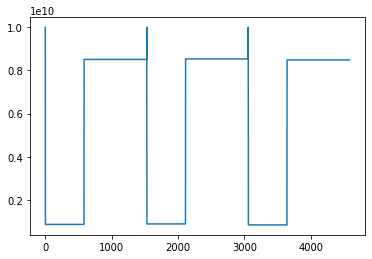

In [10]:
holdings_list = []
for i in tax_df['indexers']:
    if 1 not in i[1].delegators:
        holdings_list.append(0)
    else:
        holdings_list.append(i[1].delegators[1].holdings)
plt.plot(tax_df.index, holdings_list)

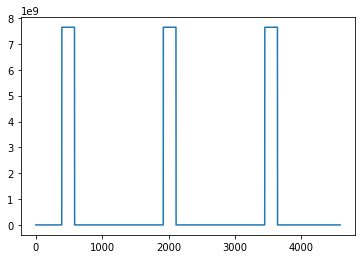

In [11]:
undelegated_list = []
for i in tax_df['indexers']:
    if 1 not in i[1].delegators:
        undelegated_list.append(0)
    else:
        undelegated_list.append(i[1].delegators[1].undelegated_tokens)
plt.plot(tax_df.index, undelegated_list)

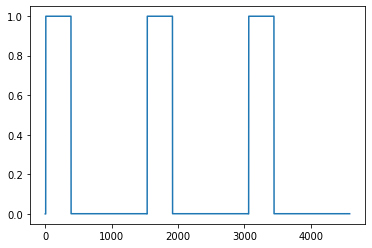

In [12]:
subgraph_list = []
for i in tax_df['indexers']:
    if i[1].indexer_revenue_cut == None:
        subgraph_list.append(0)
    else:
        subgraph_list.append(i[1].indexer_revenue_cut)
plt.plot(tax_df.index, subgraph_list)

In [13]:
tax_diff_params_dfs = {}
for i in tax_df['subset'].unique():
    tax_diff_params_dfs[i] = tax_df[tax_df['subset'] == i]
percent_diff_params_dfs = {}
for i in percent_df['subset'].unique():
    percent_diff_params_dfs[i] = percent_df[percent_df['subset'] == i]
no_slash_tax_diff_params_dfs = {}
for i in no_slash_tax_df['subset'].unique():
    no_slash_tax_diff_params_dfs[i] = no_slash_tax_df[no_slash_tax_df['subset'] == i]
no_slash_slash_diff_params_dfs = {}
for i in no_slash_slash_df['subset'].unique():
    no_slash_slash_diff_params_dfs[i] = no_slash_slash_df[no_slash_slash_df['subset'] == i]

In [14]:
len(tax_diff_params_dfs)

3

In [15]:
tax_diff_params_dfs[1]

,index,indexers,delegator_portfolios,block_number,epoch,injected_event_shift,simulation,subset,run,substep,timestep
1529,9181,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,1,0,1,1,6,1
1530,9187,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,1,0,1,1,6,2
1531,9193,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,2,0,1,1,6,3
1532,9199,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,2,0,1,1,6,4
1533,9205,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474307,4,3,0,1,1,6,5
...,...,...,...,...,...,...,...,...,...,...,...
3053,18325,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{'0x698b40f200f6c8145f9dee82c06884152c2f4a86':...,12060840,92,373,0,1,1,6,1525
3054,18331,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{'0x698b40f200f6c8145f9dee82c06884152c2f4a86':...,12062933,92,374,0,1,1,6,1526
3055,18337,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{'0x698b40f200f6c8145f9dee82c06884152c2f4a86':...,12062933,92,374,0,1,1,6,1527
3056,18343,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{'0x698b40f200f6c8145f9dee82c06884152c2f4a86':...,12063922,92,375,0,1,1,6,1528


Tax Rate =  0.0050 Profit =  -7854973775.47385758431286988
Tax Rate =  0.0025 Profit =  -7832075048.52858210827169413
Tax Rate =  0.0075 Profit =  -7877987861.24505383960871698


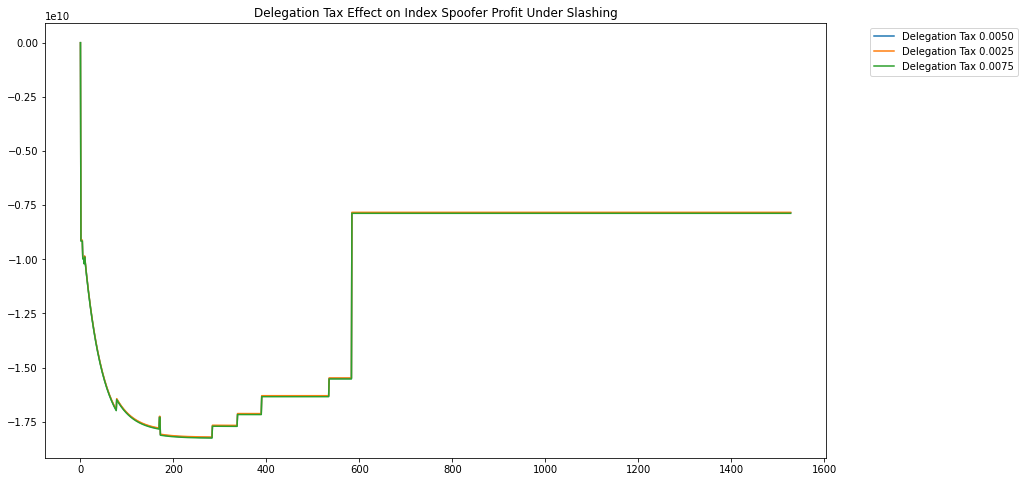

In [16]:
plt.figure(figsize=(14,8))
# plot_df = pd.DataFrame()
for i in tax_diff_params_dfs.keys():
    tax = experiment[i]['M']['delegation_tax_rate'].quantize(Decimal(10) ** -4)
    profit_list = []
    plot_df = tax_diff_params_dfs[i]
    plot_df.reset_index(inplace = True)
    initial_GRT = plot_df['indexers'][0][1].GRT
    initial_holdings = plot_df['indexers'][0][1].delegators[1].holdings
    for j in plot_df['indexers']:
        if j[1].holdings is not None:
            profit_list.append(j[1].holdings + j[1].GRT + j[1].delegators[1].holdings + j[1].cumulative_deposited_stake \
            - initial_GRT - initial_holdings)
        else:
            profit_list.append(0)
    print('Tax Rate = ', tax, 'Profit = ',profit_list[-1])
    plt.plot(plot_df.index, profit_list, label = f'Delegation Tax {tax}')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.title('Delegation Tax Effect on Index Spoofer Profit Under Slashing')  

Here we see as delegation tax increases, profit decreases which is expected. 

Tax Rate =  0.0050 Profit =  1235347330.91045928165635616
Tax Rate =  0.0025 Profit =  1258246057.85573475769753191
Tax Rate =  0.0075 Profit =  1212333245.13926302636050906


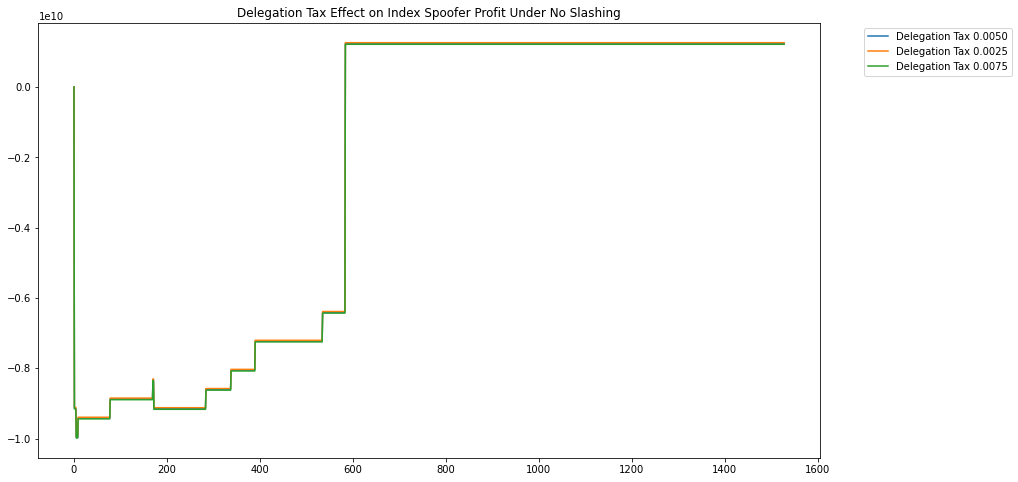

In [17]:
plt.figure(figsize=(14,8))
# plot_df = pd.DataFrame()
for i in no_slash_tax_diff_params_dfs.keys():
    tax = no_slash_tax_experiment[i]['M']['delegation_tax_rate'].quantize(Decimal(10) ** -4)
    profit_list = []
    plot_df = no_slash_tax_diff_params_dfs[i]
    plot_df.reset_index(inplace = True)
    initial_GRT = plot_df['indexers'][0][1].GRT
    initial_holdings = plot_df['indexers'][0][1].delegators[1].holdings
    for j in plot_df['indexers']:
        if j[1].holdings is not None:
            profit_list.append(j[1].holdings + j[1].GRT + j[1].delegators[1].holdings + j[1].cumulative_deposited_stake \
            - initial_GRT - initial_holdings)
        else:
            profit_list.append(0)
    print('Tax Rate = ', tax, 'Profit = ',profit_list[-1])
    plt.plot(plot_df.index, profit_list, label = f'Delegation Tax {tax}')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.title('Delegation Tax Effect on Index Spoofer Profit Under No Slashing')  

Here we see that as slashing becomes more frequent, the index spoofer loses more which is expected, however when slashing is very frequent there is no difference as there is a limited number of tokens to be slashed. We increase the chance to be slashed as based on the current data, only one indexer out of 206 got slashed, and we see that even with a slashing chance of 2% the effect the small. 

Slashing Percentage =  0.0250 Profit =  -7854973775.47385758431286988
Slashing Percentage =  0.0500 Profit =  -7855561730.39800256311285352
Slashing Percentage =  0.0750 Profit =  -7855561759.99748641529831007


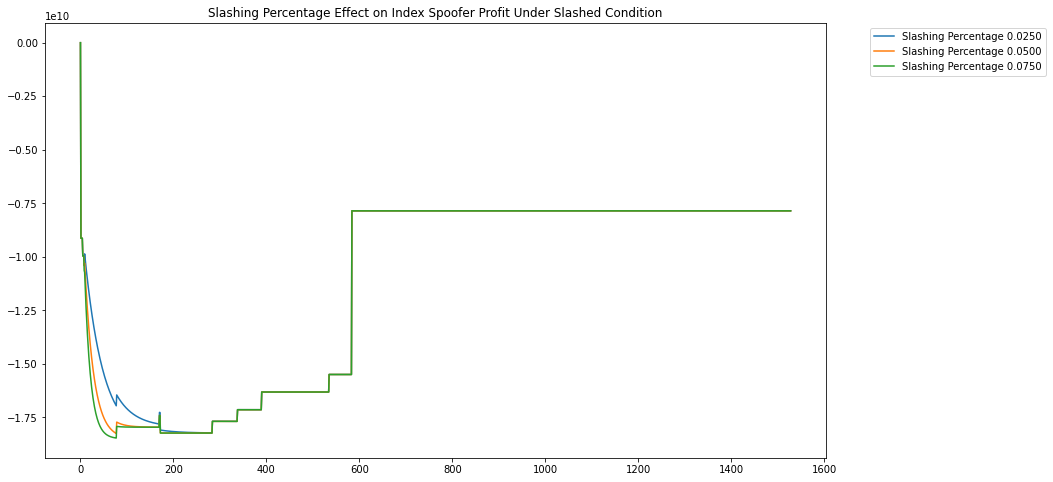

In [18]:
plt.figure(figsize=(14,8))

for i in percent_diff_params_dfs.keys():
    # estimate of value
    # TODO: get value of slashing percent from experiment_config 
    percent = slash_pct_experiment[i]['M']['slashing_percentage'].quantize(Decimal(10) ** -4)
    profit_list = []
    pct_plot_df = percent_diff_params_dfs[i]
    pct_plot_df.reset_index(inplace = True)
    initial_GRT = pct_plot_df['indexers'][0][1].GRT
    initial_holdings = pct_plot_df['indexers'][0][1].delegators[1].holdings
    for j in pct_plot_df['indexers']:
        if j[1].holdings is not None:
            profit_list.append(j[1].holdings + j[1].GRT + j[1].delegators[1].holdings + j[1].cumulative_deposited_stake \
            - initial_GRT - initial_holdings)
        else:
            profit_list.append(0)
    print('Slashing Percentage = ', percent, 'Profit = ',profit_list[-1])
    
    plt.plot(pct_plot_df.index, profit_list, label = f'Slashing Percentage {percent}')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.title('Slashing Percentage Effect on Index Spoofer Profit Under Slashed Condition')
    # plt.show() 

Here we see that as slashing percentage is increased, the index spoofer cannot profit, under the assumption that slashing will occur.

Slashing Percentage =  0.0250 Profit =  1235347330.91045928165635616
Slashing Percentage =  0.0500 Profit =  1235347330.91045928165635616
Slashing Percentage =  0.0750 Profit =  1235347330.91045928165635616


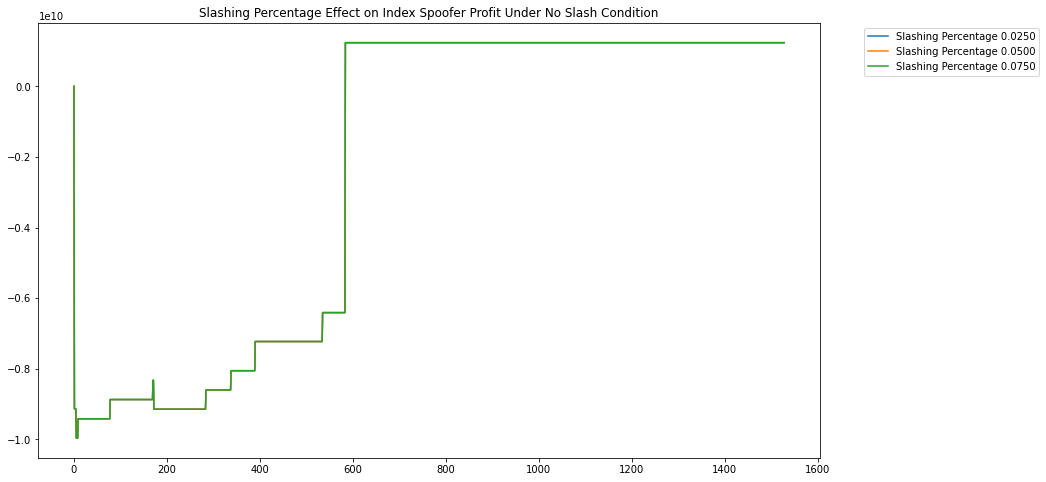

In [19]:
plt.figure(figsize=(14,8))

for i in no_slash_slash_diff_params_dfs.keys():
    # estimate of value
    # TODO: get value of slashing percent from experiment_config 
    percent = no_slash_slash_experiment[i]['M']['slashing_percentage'].quantize(Decimal(10) ** -4)
    profit_list = []
    plot_df = no_slash_slash_diff_params_dfs[i]
    plot_df.reset_index(inplace = True)
    initial_GRT = plot_df['indexers'][0][1].GRT
    initial_holdings = plot_df['indexers'][0][1].delegators[1].holdings
    for j in plot_df['indexers']:
        if j[1].holdings is not None:
            profit_list.append(j[1].holdings + j[1].GRT + j[1].delegators[1].holdings + j[1].cumulative_deposited_stake \
            - initial_GRT - initial_holdings)
        else:
            profit_list.append(0)
    print('Slashing Percentage = ', percent, 'Profit = ',profit_list[-1])
    
    plt.plot(plot_df.index, profit_list, label = f'Slashing Percentage {percent}')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.title('Slashing Percentage Effect on Index Spoofer Profit Under No Slash Condition')
    # plt.show() 

Here we see that as slashing percentage is increased, the index spoofer profit is unaffected as expected, under the assumption that slashing will not occur.

In [20]:
# plt.figure(figsize=(18,8))

# for i,j in enumerate(experiment):
#     plot_df = tax_df[i]
#     shares_list = []
#     indexer_locked_list = []
#     holdings_list = []
#     # label_one = j['M']['delegation_unbonding_period_epochs']
#     label_two = j['M']['delegation_tax_rate'].quantize(Decimal(10) ** -4)
#     for i, values in delegator_values_df[i][1].items():
#         if values.indexer_shares != {}:
#             shares_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
#         else:
#             shares_list.append(0)
#         if values.indexer_locked_tokens != {}:
#             indexer_locked_list.append(values.indexer_locked_tokens['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
#         else:
#             indexer_locked_list.append(0)
#         if values.holdings != {}:
#             holdings_list.append(values.holdings)
#         else:
#             holdings_list.append(0)            

#     holdings_list = [float(x) for x in holdings_list]
#     indexer_locked_list = [float(x) for x in indexer_locked_list]
#     shares_list = [float(x) for x in shares_list]
#     indexer_price_list = [float(x) for x in indexer_price_list]
#     shares_value = [b_i / a_i for a_i, b_i in zip(indexer_price_list, shares_list)]
#     # print(indexer_locked_list[0])
#     net_profit = [a_i + b_i + c_i - holdings_list[0] for a_i, b_i, c_i in zip(indexer_locked_list, holdings_list, shares_value)]
#     plt.subplot(121)
#     plt.plot(plot_df.index, net_profit, 
#             label = f'Tax Rate {label_two} net_profit')

#     # plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
#     plt.title('Front Running Delegator')

#     plt.subplot(122)
#     plt.plot(plot_df.index, net_profit, 
#             label = f'Tax Rate {label_two} net_profit')
#     plt.ylim(-10000)

#     plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1.0))
#     plt.title('Front Running Delegator')
# plt.savefig("./images/front_run_delegator_tax_param", facecolor='white')